# Behavior Analysis: Duration Per Behavior Bout

Press SHIFT + ENTER to run code

### USER INPUT!

In [1]:
## Define project
project_name = ''

# Select group and condition, see meta.py to see how you previously defined it for your project
selected_groups = ['', '']
selected_conditions = ['', '']

### Main Code: Create Bar Graph of Duration Per Behavior Bout

In [6]:
###### RUN DEPENDENCIES ######
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sys

if not os.path.join(os.path.abspath(''), '../') in sys.path:
    sys.path.append(os.path.join(os.path.abspath(''), '../'))

from utils.classification import load_behaviors
from utils.meta import *
import matplotlib
import warnings
import seaborn as sns

###### Load Behaviors ######
behaviors = load_behaviors(f"../processed_dataset/{project_name}/behaviors_{project_name}.pkl")

# Define the directory path
directory_path = f"../processed_dataset/{project_name}/figures/behavior_instance-durations"
if not os.path.exists(directory_path):
    os.makedirs(directory_path)

def get_duration_bouts(predict, behavior_classes, framerate=60):
    behav_durations = []
    bout_start_idx = np.where(np.diff(np.hstack([-1, predict])) != 0)[0]
    bout_durations = np.hstack([np.diff(bout_start_idx), len(predict) - np.max(bout_start_idx)])
    bout_start_label = predict[bout_start_idx]
    for b, behavior_name in enumerate(behavior_classes):
        idx_b = np.where(bout_start_label == int(b))[0]
        if len(idx_b) > 0:
            behav_durations.append(bout_durations[idx_b]/framerate)
        else:
            a = np.empty((1,))
            a[:] = np.nan
            behav_durations.append(a)
    return behav_durations



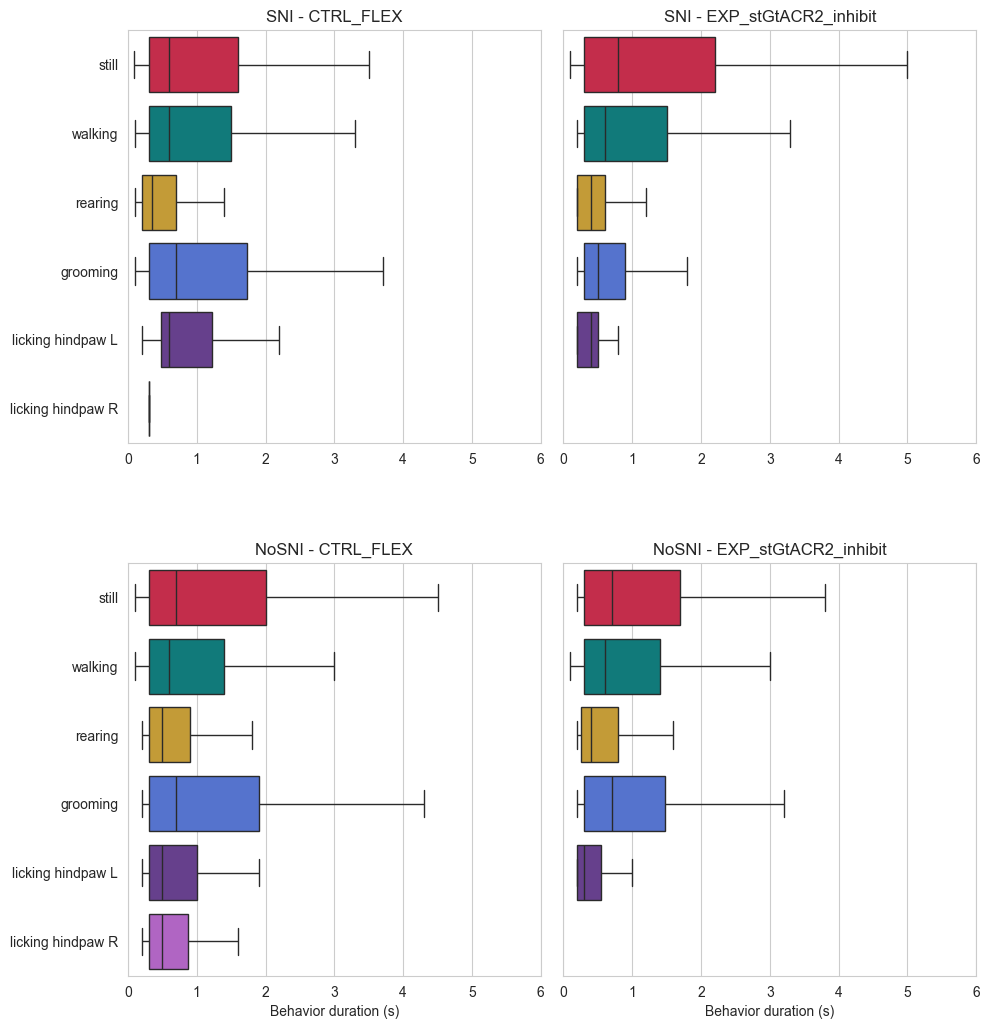

In [11]:
rows = len(selected_groups)
cols = len(selected_conditions)
count = 0
fig, ax = plt.subplots(rows, cols, figsize=(10, 11), sharex=False, sharey=True)

for row in range(rows):
    if row > 4:
        cols = 1
        fig.delaxes(ax[row, 1])
        fig.delaxes(ax[row, 2])
    else:
        cols = len(selected_conditions)
        
    for col in range(cols):
        
        selected_group = selected_groups[row]
        selected_condition = selected_conditions[col]
        
        durations_ = []
        for f in range(len(behaviors[selected_group][selected_condition])):
            durations_.append(get_duration_bouts(behaviors[selected_group][selected_condition][f'file{f}'], behavior_names))
        durations_dict = {'behavior': np.hstack([np.hstack([np.repeat(behavior_names[i],
                                                           len(durations_[f][i])) 
                                                 for i in range(len(durations_[f]))]) for f in range(len(durations_))]),
                          'duration': np.hstack([np.hstack(durations_[f]) for f in range(len(durations_))]),
                          }
        durations_df = pd.DataFrame(durations_dict)
        durations_df.to_csv(f"../processed_dataset/{project_name}/figures/behavior_instance-durations/behavior_durations_{groups[row]}_{conditions[col]}.csv")

        sns.boxplot(data=durations_df, x='duration', y='behavior', hue='behavior', 
                    orient='h', width=0.8,
                    palette=behavior_colors, showfliers=False, ax=ax[row, col])
        ax[row, col].set_ylabel('')
        ax[row, col].set_xlabel('')
        
        if col == 1 or col == 2:
            if row == rows-1:
                ax[row, col].set_xlabel('Behavior duration (s)')
        
                
        if row == rows-1:
            ax[row, col].set_xlabel('Behavior duration (s)')
        ax[row, col].set_title(f'{selected_group} - {selected_condition}')
        
        ax[row, col].set_aspect('equal', adjustable='box')
        
        ax[row, col].set_xlim(0, 6)
        
        legend = ax[row, col].get_legend()
        if legend is not None:
            legend.remove()
            
fig.savefig(f"../processed_dataset/{project_name}/figures/behavior_instance-durations/behavior_durations_{project_name}.svg", 
            dpi=600, bbox_inches='tight')
        
plt.tight_layout()
plt.show()

# ANALYSIS COMPLETE!